In [99]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, transforms
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)



train_dataloader = DataLoader(training_data, batch_size=100)
test_dataloader = DataLoader(test_data, batch_size=100)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 100),
            nn.Sigmoid(),
            nn.Linear(100, 100),
            nn.Sigmoid(),
            nn.Linear(100, 100),
            nn.Sigmoid(),
            nn.Linear(100, 10),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
model = NeuralNetwork()

In [100]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [104]:
learning_rate = 0.1
batch_size = 100
epochs = 10
loss_fn = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.115312  [    0/60000]
loss: 0.130622  [10000/60000]
loss: 0.151937  [20000/60000]
loss: 0.101064  [30000/60000]
loss: 0.045347  [40000/60000]
loss: 0.079305  [50000/60000]
Test Error: 
 Accuracy: 95.6%, Avg loss: 0.150931 

Epoch 2
-------------------------------
loss: 0.108817  [    0/60000]
loss: 0.126164  [10000/60000]
loss: 0.142604  [20000/60000]
loss: 0.096761  [30000/60000]
loss: 0.040903  [40000/60000]
loss: 0.074189  [50000/60000]
Test Error: 
 Accuracy: 95.7%, Avg loss: 0.147921 

Epoch 3
-------------------------------
loss: 0.103300  [    0/60000]
loss: 0.121928  [10000/60000]
loss: 0.134089  [20000/60000]
loss: 0.092392  [30000/60000]
loss: 0.037496  [40000/60000]
loss: 0.069271  [50000/60000]
Test Error: 
 Accuracy: 95.7%, Avg loss: 0.145322 

Epoch 4
-------------------------------
loss: 0.098534  [    0/60000]
loss: 0.117847  [10000/60000]
loss: 0.126325  [20000/60000]
loss: 0.087951  [30000/60000]
loss: 0.034829  [40000/6

In [36]:
import torchvision.models as models
model = models.vgg16(pretrained=True)
torch.save(model, 'model.pth')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/medlemine/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [05:33<00:00, 1.66MB/s]   


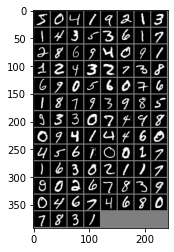

GroundTruth:  5     0     4     1     9     2     1     3     1     4     3     5     3     6     1     7     2     8     6     9     4     0     9     1     1     2     4     3     2     7     3     8     6     9     0     5     6     0     7     6     1     8     7     9     3     9     8     5     9     3     3     0     7     4     9     8     0     9     4     1     4     4     6     0    


In [105]:
import torchvision
import numpy as np
import matplotlib.pyplot as plt
def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

classes =("0","1","2","3","4","5","6","7","8","9")


dataiter = iter(train_dataloader)
images, labels = dataiter.next()



imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(64)))

In [106]:

output=model(images)
predicted = torch.max(output, 1)


print('Predicted: ', ' '.join(f'{classes[predicted[1][j]]:5s}' for j in range(64)))

Predicted:  5     0     4     1     9     2     1     3     1     4     3     5     3     6     1     7     2     8     6     9     4     0     9     1     1     2     4     3     2     7     3     8     6     9     0     5     6     0     7     6     1     8     7     9     3     9     8     5     9     3     3     0     7     4     9     8     0     9     4     1     4     4     6     0    
